# Generate Scale-Free Graph and Convert to Adjacency Matrix

<font size="2">This code generates a scale-free graph with 100 nodes using the NetworkX library in Python. It then converts the graph to an adjacency matrix, which is a common data structure used in graph algorithms. The resulting matrix is saved to a text file called "matrix.txt", with each row of the matrix on a separate line and the entries in each row separated by a single space.</font>

<font size="2">The nx.scale_free_graph() function generates a scale-free graph with a power-law degree distribution. The N variable specifies the number of nodes in the graph, and the seed variable is used to seed the random number generator for reproducibility. The graph is generated with self-loops using the G.add_edges_from() method, which adds an edge between each node and itself. The resulting graph is then converted to an undirected graph using the G.to_undirected() method.</font>

<font size="2">The code then creates an empty matrix with N rows and N columns using a list comprehension. It then iterates over each node in the graph, using G.edges(i) to obtain the set of edges connected to the node. For each edge, the code sets the corresponding entry in the matrix to 1. Finally, the code writes the matrix to a text file.</font>

<font size="2">Overall, this code demonstrates how to generate a scale-free graph and convert it to an adjacency matrix in Python, which can be useful for analyzing the properties of the graph using various graph algorithms.</font>

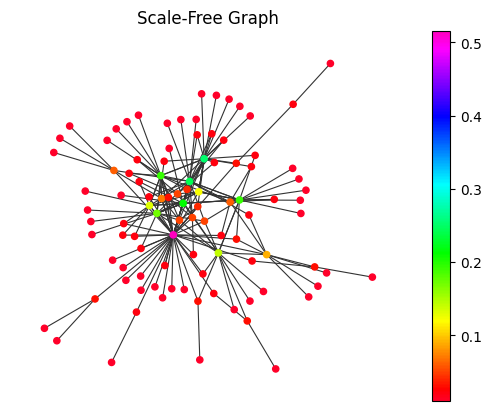

In [27]:
import networkx as nx
import random

N = 100  # 10 nodes
seed = random.randint(1, 100000)  # seed random number generators for reproducibility
# Generate a scale-free graph with self-loops
G = nx.scale_free_graph(N, seed=seed)
G.add_edges_from([(i, i) for i in G.nodes()])

# Convert the graph to an undirected graph
G = G.to_undirected()

# Remove self-loops
selfloops = list(nx.selfloop_edges(G))
G.remove_edges_from(selfloops)



matrix = [[0 for j in range(N)] for i in range(N)]

for i in range(0,N):
    connections = G.edges(i)
    # Print each connection
    for connection in connections:
        #print(connection[1])
        matrix[i][connection[1]]=1
with open("matrix.txt", "w") as f:
    # Write each row to the file
    for row in matrix:
        # Convert the numbers to strings and join them into a space-separated string
        row_str = " ".join(str(num) for num in row)
        # Write the row to the file and add a newline character
        f.write(row_str + "\n")

        
import scipy
import matplotlib.pyplot as plt                                       #import matplotlib library
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20,
                                   cmap=plt.cm.gist_rainbow,
                                   node_color=list(measures.values()))
    nx.draw_networkx_labels(G, pos, {})  # exclude labels argument
    edges = nx.draw_networkx_edges(G, pos, width=0.8, edge_color='0.2')
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig('plot.png')
    plt.show()

pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Scale-Free Graph')